In [1]:
#|default_exp app

In [2]:
#|export

import pickle  # or import joblib
from fastai.vision.all import *
import gradio as gr

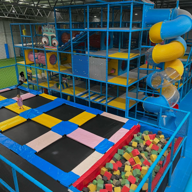

In [3]:
im = PILImage.create('indoor.jpg')
im.thumbnail((192, 192))
im

In [4]:
#|export

learn = load_learner('models/indoorclassifier.pkl')

/home/adil/miniconda3/envs/fastai/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [5]:
learn.predict(im)

('Indoor', tensor(0), tensor([0.9875, 0.0125]))

In [6]:
# %time
pred_class, pred_idx, probs = learn.predict(im)
print(f"Prediction: {pred_class}, Confidence: {probs[pred_idx]*100:.1f}%")

Prediction: Indoor, Confidence: 98.8%


In [7]:
#|export

def classify_image(img):
    img = PILImage.create(img)
    pred_class, pred_idx, probs = learn.predict(img)
    
    # Corrected: Create dict mapping class names to float probabilities
    return dict(zip(learn.dls.vocab, map(float, probs)))

In [8]:
classify_image(im)

{'Indoor': 0.9875132441520691, 'Outdoor': 0.01248681265860796}

In [ ]:
#|export
# examples = ['sunny.jpg','rainy.jpg']

intf = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(),
    outputs=gr.Label(), 
    # examples=examples,
    title="Indoor Style Classifier",
    description="Upload or choose an image to classify wether its Indoor or Outdoor"
)

intf.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


In [12]:
from nbdev.export import nb_export
nb_export('indoorload.ipynb')  # converts notebook to .py file